#1. Import packages and process data

In [ ]:
!pip install pycaret -- pre pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret import *
from pycaret.regression import *

In [ ]:
df_train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train = df_train.sample(frac=0.9, random_state=123)
validation = df_train.drop(train.index)

train.reset_index(drop=True, inplace=True)
validation.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(validation.shape))

Data for Modeling: (1314, 81)
Unseen Data For Predictions: (146, 81)


In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
1,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000
2,1305,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000
3,1373,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,274300
4,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000


In [ ]:
train.nunique()

,0
Id,1314
MSSubClass,15
MSZoning,5
LotFrontage,109
LotArea,985
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
categorical = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
               'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
               'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
               'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
               'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
               'SaleCondition',]
numerical = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
              'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
              'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
              'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
              'MoSold', 'YrSold']
ignore = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities']

#2. Create Model

In [ ]:
default = RegressionExperiment()
default = setup(data=train,  target='SalePrice', session_id=555, train_size=0.8, preprocess=True)

,Description,Value
0,Session id,555
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1314, 81)"
4,Transformed data shape,"(1314, 280)"
5,Transformed train set shape,"(1051, 280)"
6,Transformed test set shape,"(263, 280)"
7,Numeric features,37
8,Categorical features,43
9,Rows with missing values,100.0%


In [ ]:
exp1 = RegressionExperiment()
exp1 = setup(data = train,
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_imputation = 'mode',
             categorical_features = categorical,
             numeric_features = numerical,
             ignore_features = ignore,
             normalize = True,
             feature_selection = True,
             pca=True,
             remove_multicollinearity=True,
             remove_outliers = True
             )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63670
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 250
[LightGBM] [Info] Start training from score 175803.711340


,Description,Value
0,Session id,3374
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1314, 81)"
4,Transformed data shape,"(1268, 15)"
5,Transformed train set shape,"(873, 15)"
6,Transformed test set shape,"(395, 15)"
7,Ignore features,6
8,Numeric features,36
9,Categorical features,37


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
top3_default = default.compare_models(n_select=3, sort = 'RMSE') #default appears to be performing better (lower RMSE)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15809.5807,903047807.2958,28365.6211,0.8707,0.1315,0.0902,8.4970
gbr,Gradient Boosting Regressor,17438.0253,1017950501.8083,30109.5773,0.8563,0.1419,0.0991,1.6190
rf,Random Forest Regressor,19102.0267,1123660213.1840,32328.2848,0.8355,0.1559,0.1107,3.3010
lightgbm,Light Gradient Boosting Machine,18222.2891,1113377184.5088,32333.0386,0.8368,0.1466,0.1019,1.4950
et,Extra Trees Regressor,18827.5624,1118674859.1134,32346.8362,0.8382,0.1548,0.1094,3.4580
xgboost,Extreme Gradient Boosting,19377.6166,1173073937.8429,32593.7406,0.8301,0.1519,0.1089,1.4730
llar,Lasso Least Angle Regression,19573.1497,1516387787.7939,35973.8604,0.7622,0.1762,0.1145,1.1320
ridge,Ridge Regression,20559.7181,1478269155.9335,36309.5944,0.7738,0.1725,0.1199,0.9780
lasso,Lasso Regression,20538.8995,1556508657.0592,37775.6080,0.7531,0.1962,0.1208,0.9410
en,Elastic Net,20779.0409,1698720329.3164,38074.2533,0.7520,0.1778,0.1193,0.9740


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
top3_exp1 = exp1.compare_models(n_select=3, sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,19556.2109,870626779.7236,29152.1485,0.8521,0.1629,0.1211,4.3280
et,Extra Trees Regressor,19321.0189,896882648.5958,29450.9393,0.8490,0.1597,0.1178,4.3620
rf,Random Forest Regressor,19810.0932,945819392.3911,30336.0860,0.8416,0.1630,0.1203,4.5560
xgboost,Extreme Gradient Boosting,20824.2802,996792065.3081,31212.4610,0.8273,0.1704,0.1268,4.1400
catboost,CatBoost Regressor,19668.2014,1078480625.6107,32153.1201,0.8242,0.1655,0.1197,8.5660
lightgbm,Light Gradient Boosting Machine,20969.4918,1105807203.1094,32770.0399,0.8187,0.1746,0.1293,4.2870
br,Bayesian Ridge,22266.0972,1183985029.7689,33887.8101,0.8052,0.1859,0.1357,3.7790
en,Elastic Net,21867.7646,1188229765.1518,33933.4931,0.8067,0.1749,0.1317,4.0110
ridge,Ridge Regression,22502.8135,1209118545.5313,34213.9239,0.8003,0.1904,0.1379,3.7500
llar,Lasso Least Angle Regression,22533.5092,1212509729.1526,34257.4027,0.7997,0.1909,0.1381,4.1740


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
catboost = default.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17483.5479,1178972101.1191,34336.1632,0.8075,0.1384,0.0916
1,11967.2130,254899857.2913,15965.5835,0.9354,0.1115,0.0786
2,20590.9413,2453322910.0914,49531.0298,0.6420,0.1643,0.1031
3,14624.9492,544726874.3612,23339.3846,0.9037,0.1190,0.0858
4,14415.0757,426400878.5198,20649.4765,0.9275,0.1108,0.0816
5,16423.0234,651459801.9205,25523.7106,0.9120,0.1369,0.0927
6,16645.4176,1732075913.7260,41618.2161,0.8285,0.1140,0.0748
7,15394.9741,541403732.6383,23268.0840,0.9240,0.1552,0.1064
8,16794.7719,801200822.2576,28305.4910,0.8884,0.1304,0.0961


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
random_forest = default.create_model('rf') #for interpretability of feature importance

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19990.0808,1634467367.5581,40428.5464,0.7331,0.1624,0.1074
1,15867.4246,537454103.2888,23183.0564,0.8637,0.1487,0.1083
2,24072.5999,2412880172.4777,49121.0767,0.6479,0.1780,0.1216
3,17785.3322,796928498.1910,28229.9220,0.8591,0.1374,0.0983
4,16297.8392,540643087.8012,23251.7330,0.9081,0.1232,0.0919
5,20411.4857,986382834.1340,31406.7323,0.8668,0.1560,0.1129
6,21220.3542,1992915631.8805,44642.0836,0.8027,0.1413,0.1010
7,18777.8902,751976635.2412,27422.1924,0.8944,0.1753,0.1278
8,19717.7520,1031940231.4759,32123.8265,0.8562,0.1686,0.1224


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
xgboost = default.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20120.7265,1027182522.0182,32049.6883,0.8322,0.1432,0.1029
1,16947.7600,536753989.1809,23167.9518,0.8639,0.1436,0.1096
2,25895.4220,3182791691.7376,56416.2361,0.5356,0.1862,0.1294
3,18636.9630,875374177.7776,29586.7230,0.8452,0.1438,0.1047
4,18189.6047,671310744.8156,25909.6651,0.8858,0.1208,0.0962
5,20056.1671,842131627.2451,29019.5043,0.8863,0.1608,0.1135
6,20335.8135,2303254515.4809,47992.2339,0.7720,0.1370,0.0914
7,18424.2907,707138028.0941,26592.0670,0.9007,0.1766,0.1240
8,19579.9633,1097515911.4309,33128.7777,0.8471,0.1574,0.1130


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
catboost.get_params()

{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 555}

In [ ]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 555,
 'verbose': 0,
 'warm_start': False}

In [ ]:
tune_catboost = default.tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18310.6726,953466305.3825,30878.2497,0.8443,0.1350,0.0959
1,14024.7828,335309639.1026,18311.4620,0.9150,0.1336,0.0952
2,21249.4775,1832491005.4406,42807.6045,0.7326,0.1570,0.1031
3,16943.5989,728572184.1188,26992.0763,0.8712,0.1302,0.0971
4,17167.7790,545219191.9567,23349.9292,0.9073,0.1266,0.0978
5,18478.8724,751601175.1883,27415.3456,0.8985,0.1442,0.1006
6,19366.1664,1891725007.7581,43493.9652,0.8127,0.1261,0.0894
7,18841.7632,755255691.7956,27481.9157,0.8939,0.1735,0.1255
8,18728.2378,853547156.0850,29215.5294,0.8811,0.1438,0.1102


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tune_random_forest = default.tune_model(random_forest)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20266.6990,1777470734.8095,42160.0609,0.7097,0.1667,0.1087
1,14870.6196,441838988.6527,21019.9664,0.8880,0.1470,0.1053
2,25292.7042,2532197538.6966,50320.9453,0.6305,0.1876,0.1313
3,17525.4074,816938547.7714,28582.1369,0.8556,0.1403,0.0987
4,17421.1570,580671372.0729,24097.1237,0.9013,0.1315,0.0997
5,20063.1519,1059572429.8210,32551.0742,0.8569,0.1595,0.1129
6,22569.8417,2338581641.9134,48358.8838,0.7685,0.1521,0.1065
7,20497.5138,842449882.3038,29024.9872,0.8817,0.1868,0.1387
8,21739.7632,1195296427.1512,34573.0593,0.8335,0.1810,0.1360


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tune_xgboost = default.tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17901.2815,1187883015.1754,34465.6788,0.8060,0.1463,0.0988
1,13667.4110,354199918.6289,18820.1997,0.9102,0.1222,0.0891
2,21811.1056,2252281957.8437,47458.2128,0.6714,0.1634,0.1095
3,16747.6561,675971886.2741,25999.4593,0.8805,0.1222,0.0904
4,16005.3615,528993844.2403,22999.8662,0.9100,0.1142,0.0855
5,17304.1896,677190468.9571,26022.8836,0.9085,0.1502,0.1008
6,17956.9240,1920647954.1699,43825.1977,0.8098,0.1218,0.0812
7,16796.7227,600071505.4965,24496.3570,0.9157,0.1594,0.1139
8,18081.9414,917601832.1779,30291.9434,0.8721,0.1376,0.1027


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tune_catboost.get_params()

{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 555}

In [ ]:
tune_random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 555,
 'verbose': 0,
 'warm_start': False}

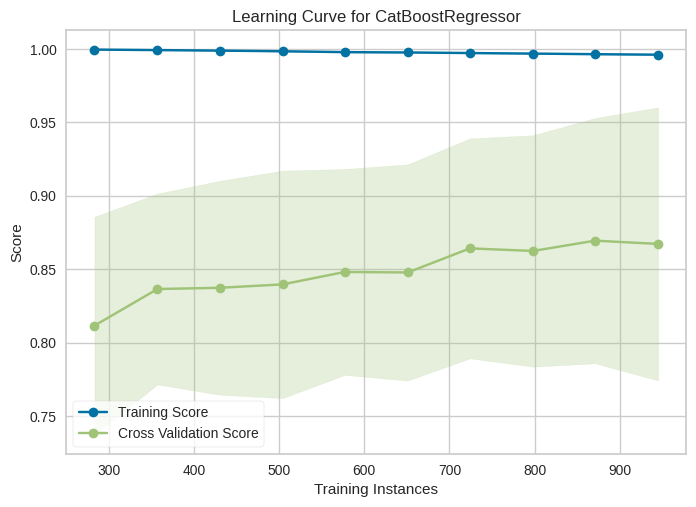

In [ ]:
default.plot_model(tune_catboost, plot = 'learning')

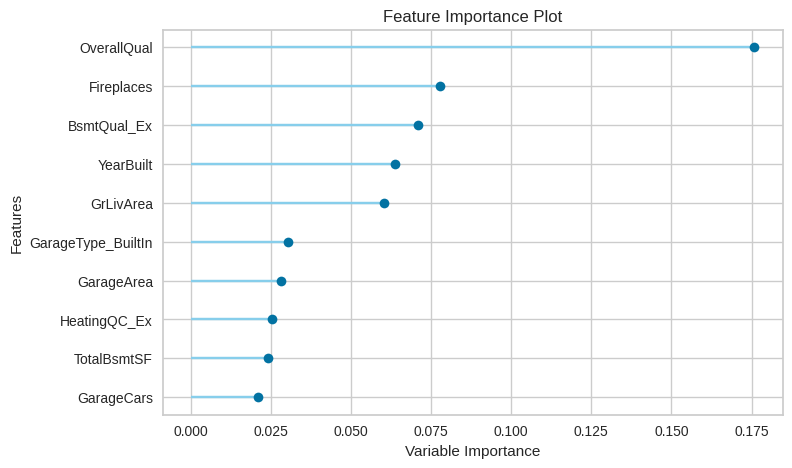

In [ ]:
default.plot_model(tune_xgboost, plot = 'feature') #not the best performing, used to understand features

In [ ]:
stacker = default.stack_models(estimator_list = top3_default) #best performer of the tuned models in RMSE (kaggle metric)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18189.1461,1313794110.1989,36246.2979,0.7854,0.1453,0.0982
1,13263.3741,310320257.2517,17615.9092,0.9213,0.1245,0.0858
2,21140.3843,2574123464.4761,50735.8203,0.6244,0.1663,0.1052
3,15004.1688,569486736.2799,23863.9212,0.8993,0.1251,0.0889
4,15816.3550,526457122.8179,22944.6535,0.9105,0.1195,0.0887
5,16154.2680,638073202.4799,25260.1109,0.9138,0.1404,0.0923
6,16666.1760,1688959663.0650,41096.9544,0.8328,0.1143,0.0757
7,15790.8813,516350026.1753,22723.3366,0.9275,0.1551,0.1076
8,16540.3301,822995484.8257,28687.8979,0.8853,0.1305,0.0932


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
final_stacker = default.finalize_model(stacker)

In [ ]:
validation_predictions = default.predict_model(final_stacker, data=validation)
validation.tail()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,13806.9224,413805301.9098,20342.2049,0.9377,0.1146,0.0786


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
141,1434,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,186500
142,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
143,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
144,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
145,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
Lincoln_Whiting_final_submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
Lincoln_Whiting_final_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
predictions = predict_model(final_stacker, data=test)
Lincoln_Whiting_final_submission['SalePrice'] = predictions['prediction_label']
Lincoln_Whiting_final_submission.to_csv('submission.csv', index=False)
Lincoln_Whiting_final_submission.head()

,Id,SalePrice
0,1461,120044.609364
1,1462,163217.049468
2,1463,180266.059330
3,1464,189720.356456
4,1465,184366.982253
